Exploratory data analysis or EDA, is an approach to analyze data in order to summarize main characteristics of the data, gain better understanding of the data set, uncover relationships between different variables and extract important variables for the problem we're trying to solve.

# Descriptive Statistics

Describe basic features of data

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv('usedcars.csv', names = headers)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


for categorical data we can use  value_counts()


In [44]:
drive_wheel_counts=df["drive-wheels"].value_counts()
drive_wheel_counts = df["drive-wheels"].value_counts().rename_axis('drive-wheels').rename('value_counts')

drive_wheel_counts.index.name='drive-wheels'
drive_wheel_counts


drive-wheels
fwd    120
rwd     76
4wd      9
Name: value_counts, dtype: int64

# Box Plot
used to see the quartiles of data,outliners and also skewness of data

In [50]:
df['price'] = pd.to_numeric(df['price'], errors='coerce') #converting price to numeric


<Axes: xlabel='drive-wheels', ylabel='price'>

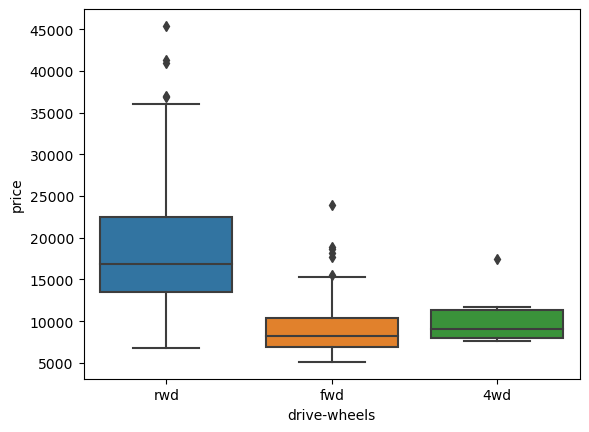

In [51]:
sns.boxplot(x="drive-wheels",y="price",data=df)

# scatter plot
used for continious data
shows relationship between two variables Predictor/independent variable on x axis and target/dependent variable on y axis

Text(0.5, 0, 'engine-size')

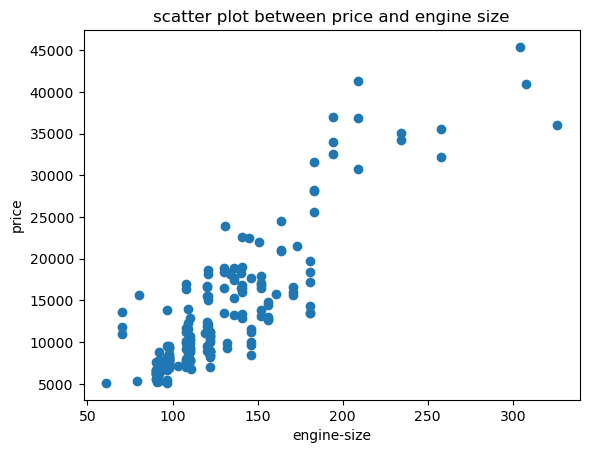

In [58]:
y=df["price"]
x=df["engine-size"]
plt.scatter(x,y)
plt.title("scatter plot between price and engine size")
plt.ylabel("price")
plt.xlabel("engine-size")

# Grouping Data
- can be used in categorical variables
- group data into categories
- single or multiple variables



 let's say we are interested in finding the average price of vehicles and observe how they differ between different types of body styles and drive wheels variables.

In [60]:
df_test=df[['drive-wheels','body-style','price']]#pick out the three data columns we are interested in
df_grp=df_test.groupby(['drive-wheels','body-style'],as_index=False).mean() # take the mean of each group and append this bit at the very end 
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


To make it easier to understand, we can transform this table to a PivotTable by using the pivot method.

In [62]:
df_pivot=df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Another way to represent the PivotTable is using a heatmap plot. Heatmap takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.

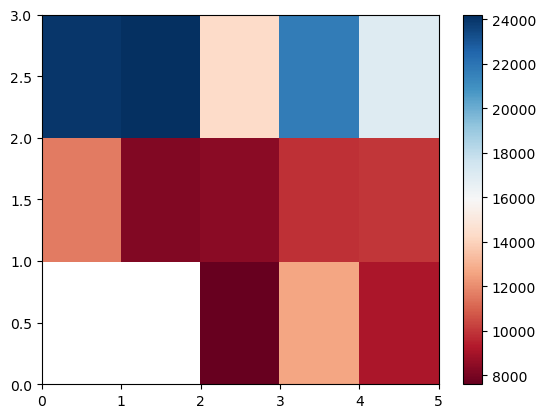

In [63]:
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

# Corelation
specifies to the extent which the variables are related to each otheer

pearsons corelation method measures the strength of corelation between two features
it gives
- corelation cofficient
- p value



corelation cofficient
---
+1->positive corealtion
-1->negative corelation
0-> no corelation

---
pvalue
<0.001 strong certanity in result  >0.1 no certanity




In [72]:
from scipy import stats 
df['price'] = pd.to_numeric(df['price'], errors='coerce') #converting price to numeric
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')#converting horsepower to numreic

# Drop rows with NaN values in either 'price' or 'horsepower' column
df.dropna(subset=['price', 'horsepower'], inplace=True)


pearson_coef,p_value=stats.pearsonr(df['horsepower'], df['price'])
pearson_coef,p_value

(0.8105330821322062, 1.1891278276945975e-47)

# Corelation Heatmap

<Axes: >

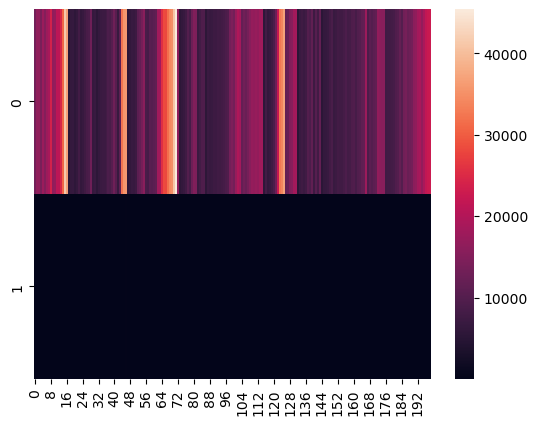

In [78]:
data=[df['price'],df['horsepower']]
sns.heatmap(data)